In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from phlame import simulation

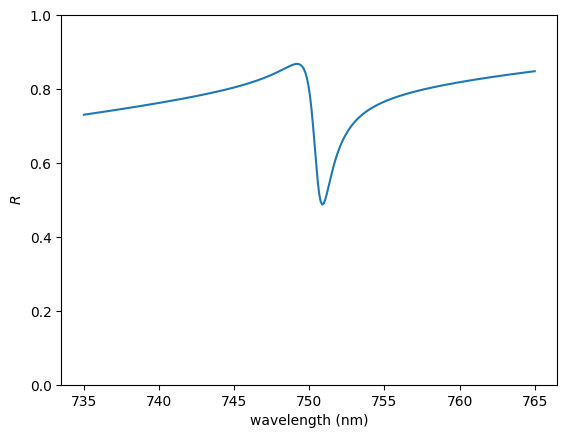

In [3]:
hc = 1.240e6

gamma_r = 3
gamma_nr = 0.3
wavelength_range = np.linspace(735, 765, 300)

wavelength0 = 750
order_num = 1

sim = simulation.new()

sim.stack.define_material('vacuum', 1)
sim.stack.define_material('hBN', 4.7)
sim.stack.define_material('tmd', 1, two_dimensional=True)
sim.stack.define_material('gold', -19.9 + 1.23*1j)
sim.stack.define_material('graphene', 2.59 + 7.2*1j)

sim.stack.add_layers(['vacuum', 'hBN', 'tmd', 'hBN', 'graphene', 'vacuum', 'gold'],
                     [None, 23.5, None, 17, 3, 380, None])

r = np.zeros_like(wavelength_range)
for i, wavelength in enumerate(wavelength_range):
    frequency = 2*np.pi/wavelength
    detuning = hc*(1/wavelength - 1/wavelength0)
    chi_2d = -gamma_r/frequency/(detuning + 1j*gamma_nr/2)
    sim.stack.define_material('tmd', chi_2d)
    sim.set_frequency(frequency) 
    sim.run()  
    r[i] = np.abs(sim.get_reflection(polarization_in=[1,0], polarization_out=[1,0]))**2


plt.plot(wavelength_range, r);
plt.ylim(0, 1);
plt.xlabel("wavelength (nm)");
plt.ylabel("$R$");

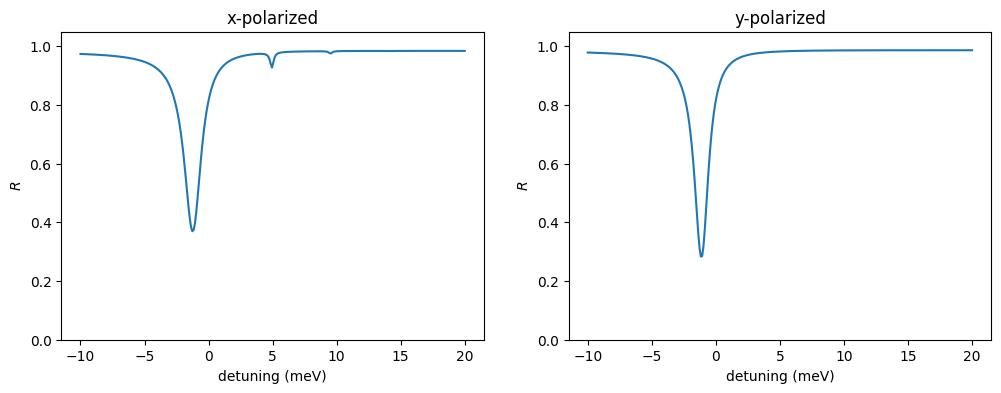

In [4]:
hc = 1.240e6

# in meV
gamma_r = 3
gamma_nr = 0.3
detuning_range = np.linspace(-10, 20, 300)

# in nm
wavelength0 = 750
lattice_constant = 50

# number of Fourier orders
order_num = 50

sim = simulation.new(order_num=order_num)

sim.stack.set_lattice_constant(lattice_constant)

sim.stack.define_material('vacuum', 1)
sim.stack.define_material('hBN', 4.7)
sim.stack.define_material('tmd', 1, two_dimensional=True)
sim.stack.define_material('silver', -26.1 + 0.60*1j)

sim.stack.define_pattern('grating', ['silver', 'vacuum'], [12.5, 37.5])

sim.stack.add_layers(['vacuum', 'hBN', 'tmd', 'hBN', 'grating', 'silver'], [None, 10, None, 10, 12.5, None])

rs = np.zeros_like(detuning_range)
rp = np.zeros_like(detuning_range)

for i, detuning in enumerate(detuning_range):
    frequency = 2*np.pi*(1/wavelength0 + detuning/hc) 
    chi_2d = -gamma_r/frequency/(detuning + 1j*gamma_nr/2)
    sim.stack.define_material('tmd', chi_2d)    
    sim.set_frequency(frequency) 
    sim.run()
    rs[i] = np.abs(sim.get_reflection(polarization_in=[1,0], polarization_out=[1,0]))**2
    rp[i] = np.abs(sim.get_reflection(polarization_in=[0,1], polarization_out=[0,1]))**2

    
plt.figure(1, figsize=(12, 4))
plt.subplot(121)
plt.plot(detuning_range, rp);
plt.xlabel("detuning (meV)")
plt.ylabel("$R$")
plt.title("x-polarized")
plt.ylim(0, 1.05);
plt.subplot(122)
plt.plot(detuning_range, rs);
plt.ylim(0, 1.05);
plt.xlabel("detuning (meV)");
plt.ylabel("$R$");
plt.title("y-polarized");
plt.show()